# Bank Note Authentication

##### Bank Note Authentication Data Set
Download: Data Folder, Data Set Description

Abstract: Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.

Data Set Characteristics:  

Multivariate

Number of Instances:

1372


Source:

Owner of database: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe, volker.lohweg '@' hs-owl.de)
Donor of database: Helene DÃ¶rksen (University of Applied Sciences, Ostwestfalen-Lippe, helene.doerksen '@' hs-owl.de)
Date received: August, 2012


Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

In [5]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset

df = pd.read_csv("dataset/BankNote_Authentication.csv")

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<AxesSubplot:ylabel='class'>

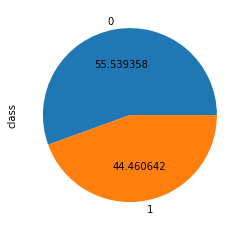

In [24]:
df["class"].value_counts().plot.pie(autopct="%1f")

In [7]:
X = df.iloc[:,:-1]

In [8]:
y = df.iloc[:,-1]

In [27]:
#splitting the data into train test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.3,
                                                random_state =20)

In [29]:
X_train.shape

(960, 4)

In [30]:
X_test.shape

(412, 4)

In [31]:
#Model implementation

from sklearn.ensemble import RandomForestClassifier

In [32]:
clf = RandomForestClassifier()

In [33]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred = clf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.9975728155339806

In [37]:
#saving the model

import pickle

In [39]:
pickle_out = open("clf.pkl","wb")

In [40]:
pickle.dump(clf,pickle_out)

In [41]:
pickle_out.close()